# 14장. Prophet 운용

## 모델 저장하기(Saving a model)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
from prophet import Prophet
import json
from prophet.serialize import model_to_json, model_from_json

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Book7/data/baltimore_crime.csv')
df.columns = ['ds', 'y']
df.loc[df['y'] > 250, 'y'] = None

model = Prophet()
model.fit(df)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurdhezbk/0hvqt5d9.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurdhezbk/iwp8twn4.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=38077', 'data', 'file=/tmp/tmpurdhezbk/0hvqt5d9.json', 'init=/tmp/tmpurdhezbk/iwp8twn4.json', 'output', 'file=/tmp/tmpurdhezbk/prophet_modeltfj981fs/prophet_model-20250709233949.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
23:39:49 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
23:39:50 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
with open('baltimore_crime_model.json', 'w') as file_out:
    json.dump(model_to_json(model), file_out)

In [ ]:
with open('baltimore_crime_model.json', 'r') as file_in:
    model = model_from_json(json.load(file_in))

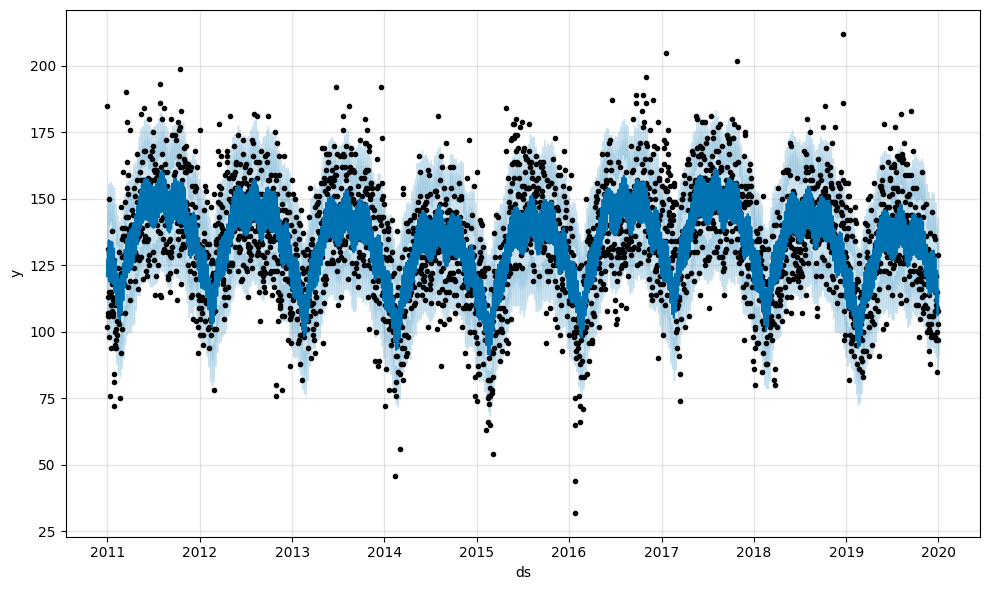

In [ ]:
forecast = model.predict()
fig = model.plot(forecast)

## 적합 모델 업데이팅(Updating a fitted model)

In [ ]:
df_yesterday = df[df['ds'] < df['ds'].max()]

In [ ]:
model1 = Prophet().fit(df_yesterday)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurdhezbk/wjc43zbz.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurdhezbk/gswu1flu.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=32316', 'data', 'file=/tmp/tmpurdhezbk/wjc43zbz.json', 'init=/tmp/tmpurdhezbk/gswu1flu.json', 'output', 'file=/tmp/tmpurdhezbk/prophet_modelcegumnm_/prophet_model-20250709234002.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
23:40:02 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
23:40:03 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
%timeit model2 = Prophet().fit(df)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurdhezbk/69lrf2sh.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurdhezbk/u0e2ji4i.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=4569', 'data', 'file=/tmp/tmpurdhezbk/69lrf2sh.json', 'init=/tmp/tmpurdhezbk/u0e2ji4i.json', 'output', 'file=/tmp/tmpurdhezbk/prophet_modelj2k6ektw/prophet_model-20250709234006.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
23:40:06 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
23:40:06 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
# import numpy as np

# class StanInit:
#     def __init__(self, model):
#         if model.mcmc_samples == 0:
#             self.params = {
#                 'k': model.params['k'][0][0],
#                 'm': model.params['m'][0][0],
#                 'sigma_obs': model.params['sigma_obs'][0][0],
#                 'delta': model.params['delta'][0],
#                 'beta': model.params['beta'][0]
#             }
#         else:
#             self.params = {
#                 'k': np.mean(model.params['k'], axis=0),
#                 'm': np.mean(model.params['m'], axis=0),
#                 'sigma_obs': np.mean(model.params['sigma_obs']),
#                 'delta': np.mean(model.params['delta'], axis=0),
#                 'beta': np.mean(model.params['beta'], axis=0)
#             }
#     def __call__(self):
#         return self.params

import numpy as np

class StanInit:
    def __init__(self, model):
        self.params = {
            'k': np.mean(model.params['k']),
            'm': np.mean(model.params['m']),
            'sigma_obs': np.mean(model.params['sigma_obs']),
            'delta': np.mean(model.params['delta'], axis=0),
            'beta': np.mean(model.params['beta'], axis=0)
        }
    def __call__(self):
        return self.params

In [ ]:
%timeit model2 = Prophet().fit(
    df,
    inits=StanInit(model1)())

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurdhezbk/jyrfjvem.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurdhezbk/basrfgrw.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=37479', 'data', 'file=/tmp/tmpurdhezbk/jyrfjvem.json', 'init=/tmp/tmpurdhezbk/basrfgrw.json', 'output', 'file=/tmp/tmpurdhezbk/prophet_modelv01xpcdv/prophet_model-20250709234019.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
23:40:19 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
23:40:19 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
# 런타임 3분 30초 소요
model1 = Prophet().fit(df)
model2 = Prophet(mcmc_samples=200).fit(
    df,
    inits=StanInit(model1)())

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurdhezbk/izm_crzj.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurdhezbk/2x4aolpi.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=14946', 'data', 'file=/tmp/tmpurdhezbk/izm_crzj.json', 'init=/tmp/tmpurdhezbk/2x4aolpi.json', 'output', 'file=/tmp/tmpurdhezbk/prophet_modelh9jlyt22/prophet_model-20250709234023.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
23:40:23 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
23:40:24 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:cmd: /usr/local/lib/python

chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'id=1', 'random', 'seed=77862', 'data', 'file=/tmp/tmpurdhezbk/_dx6br3u.json', 'init=/tmp/tmpurdhezbk/lg5yz0kt.json', 'output', 'file=/tmp/tmpurdhezbk/prophet_modelk45gvmar/prophet_model-20250709234024_1.csv', 'method=sample', 'num_samples=100', 'num_warmup=100', 'algorithm=hmc', 'adapt', 'engaged=1']
DEBUG:cmdstanpy:idx 1
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'id=2', 'random', 'seed=77862', 'data', 'file=/tmp/tmpurdhezbk/_dx6br3u.json', 'init=/tmp/tmpurdhezbk/lg5yz0kt.json', 'output', 'file=/tmp/tmpurdhezbk/prophet_modelk45gvmar/prophet_model-20250709234024_2.csv', 'method=sample', 'num_samples=100', 'num_warmup=100', 'algorithm=hmc', 'adapt', 'engaged=1']
DEBUG:cmdstanpy:idx 2
DEBUG:cmds

23:43:46 - cmdstanpy - INFO - CmdStan done processing.
INFO:cmdstanpy:CmdStan done processing.
DEBUG:cmdstanpy:runset
RunSet: chains=4, chain_ids=[1, 2, 3, 4], num_processes=4
 cmd (chain 1):
	['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'id=1', 'random', 'seed=77862', 'data', 'file=/tmp/tmpurdhezbk/_dx6br3u.json', 'init=/tmp/tmpurdhezbk/lg5yz0kt.json', 'output', 'file=/tmp/tmpurdhezbk/prophet_modelk45gvmar/prophet_model-20250709234024_1.csv', 'method=sample', 'num_samples=100', 'num_warmup=100', 'algorithm=hmc', 'adapt', 'engaged=1']
 retcodes=[0, 0, 0, 0]
 per-chain output files (showing chain 1 only):
 csv_file:
	/tmp/tmpurdhezbk/prophet_modelk45gvmar/prophet_model-20250709234024_1.csv
 console_msgs (if any):
	/tmp/tmpurdhezbk/prophet_modelk45gvmar/prophet_model-20250709234024_0-stdout.txt
DEBUG:cmdstanpy:Chain 1 console:
method = sample (Default)
  sample
    num_samples = 100
    num_warmup = 100
    save_warmup = 0 (Default)
    thin = 1 (Defau

## Plotly로 인터랙티브 플롯 생성(Making interactive plots with Plotly)

In [ ]:
from datetime import timedelta
import plotly.offline as py
py.init_notebook_mode()

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Book7/data/divvy_daily.csv')
df = df[['date', 'rides', 'temperature']]
df['date'] = pd.to_datetime(df['date'])
df.columns = ['ds', 'y', 'temp']

In [ ]:
model = Prophet(seasonality_mode='multiplicative',
                yearly_seasonality=6)
model.add_regressor('temp')

model.fit(df[df['ds'] < df['ds'].max() - timedelta(weeks=2)])

future = model.make_future_dataframe(periods=14)
future['temp'] = df['temp']
forecast = model.predict(future)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurdhezbk/kb0_0mus.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurdhezbk/i31cy0l1.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=55123', 'data', 'file=/tmp/tmpurdhezbk/kb0_0mus.json', 'init=/tmp/tmpurdhezbk/i31cy0l1.json', 'output', 'file=/tmp/tmpurdhezbk/prophet_modelh3omksks/prophet_model-20250709234429.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
23:44:29 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
23:44:29 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
from prophet.plot import (
    plot_plotly,
    plot_components_plotly,
    plot_forecast_component_plotly,
    plot_seasonality_plotly
)

### Plotly 예측 플롯(Plotly forecast plot)

In [ ]:
import plotly
plotly.__version__  # Plotly 버전 확인 (최신 버전이 5.x 이상이어야 함)

'5.24.1'

In [ ]:
### 역자 수정 코드
import plotly.io as pio
pio.renderers.default = 'colab'


In [ ]:
fig = plot_plotly(model, forecast, trend=True)
py.iplot(fig)

### Plotly 구성 요소 플롯(Plotly components plot)

In [ ]:
### my eyes only: Warning message 참조, 단, Warning message를 없앨 수 있으면 해 볼 것
### my eyes only: 1차 시도에서는 Warning message가 없어지지 않고 있으며, 정 없어지지 않으면 이대로 출간해도 될 듯
fig = plot_components_plotly(model, forecast , figsize=(800, 175))
py.iplot(fig)

/usr/local/lib/python3.11/dist-packages/plotly/io/_json.py:560: UserWarning:

Discarding nonzero nanoseconds in conversion.



### Plotly 단일 구성 요소 플롯(Plotly single component plot)

In [ ]:
fig = plot_forecast_component_plotly(model, forecast, 'temp')
py.iplot(fig)

### Plotly 계절성 플롯(Plotly seasonality plot)

In [ ]:
fig = plot_seasonality_plotly(model, 'yearly')
py.iplot(fig)

/usr/local/lib/python3.11/dist-packages/plotly/io/_json.py:560: UserWarning:

Discarding nonzero nanoseconds in conversion.

